# **Data Pre-processing**

### **Import Libraries**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, Ellipse

import numpy as np
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load Dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Global_cleaned.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3


### **Class Distribution Analysis**

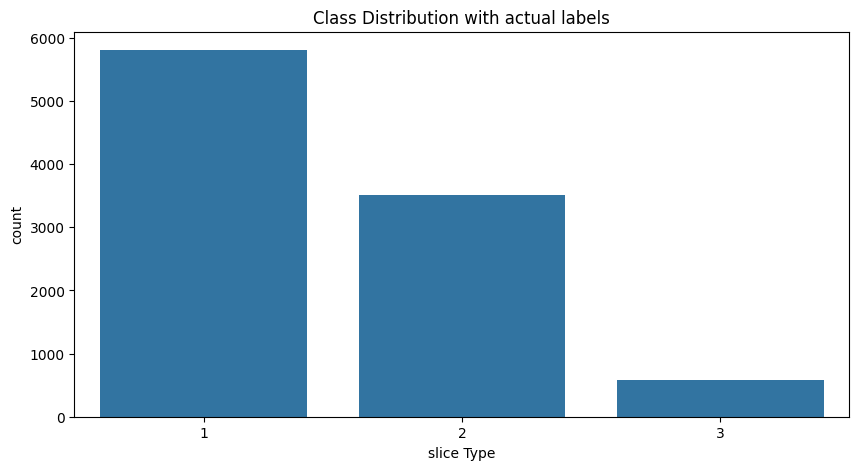

In [4]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### **Experiment 15 with undersampling**

Activate this section of Experiment 7 when willing to perform undersampling before proceeding with the further steps.

In [5]:
# # Identify the majority class
# majority_class = data['slice Type'].value_counts().idxmax()

# # Count the number of data points in the majority class
# majority_count = data['slice Type'].value_counts()[majority_class]

# # Count the number of data points in the other two classes
# minority_count = data['slice Type'].value_counts().min()

# # Calculate the number of data points to remove from the majority class
# num_to_remove = majority_count - minority_count

# # Randomly select data points from the majority class to remove
# majority_indices = data[data['slice Type'] == majority_class].index
# remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)

# # Remove the selected data points from the DataFrame
# balanced_data = data.drop(remove_indices)

In [6]:
# data = balanced_data
# data.head()

In [7]:
# plt.figure(figsize=(6, 5))
# sns.countplot(x=data['slice Type'])
# plt.title('Balanced Class Distribution with actual labels')
# plt.show()

### **Define X and y**

In [8]:
X = data.drop(columns=['slice Type'])
X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,2.019412,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06
9896,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,2.029394,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06
9897,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,2.037339,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06
9898,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.797084,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06


In [9]:
features = X.columns.tolist()
features
print(len(features))

43


In [10]:
y = data['slice Type']
y

0       3
1       3
2       3
3       3
4       3
       ..
9895    2
9896    2
9897    2
9898    2
9899    2
Name: slice Type, Length: 9900, dtype: int64

In [11]:
np.unique(y)

array([1, 2, 3])

### **Ground Truth Calculation**

#### **Ground Truth Slice 1**

In [12]:
# Group data by label "slice 0"
grouped_data_slice1 = data[data['slice Type'] == 1]
grouped_data_slice1

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
888,487350.000000,657.000000,0.713976,0.713976,0.713976,0.713976,0.713976,0.713976,0.0,0.0,...,12.605465,70144.0,32256.0,1.761460e+09,1.223059e+09,0.015993,0.001300,0.014693,1.114200e+04,1
889,348351.000000,74.000000,0.233904,0.233904,0.233904,0.233904,0.233904,0.233904,0.0,0.0,...,25.651548,78336.0,66816.0,9.797546e+07,2.274121e+09,0.069788,0.056029,0.013759,7.261800e+04,1
890,37560.000000,3089.000000,0.248047,0.248047,0.248047,0.248047,0.248047,0.248047,0.0,0.0,...,28.220459,77312.0,31104.0,7.314393e+08,1.545543e+09,0.017124,0.001247,0.015877,8.346800e+04,1
891,529670.000000,6474.000000,2.971093,2.971093,2.971093,2.971093,2.971093,2.971093,0.0,0.0,...,199.253281,743424.0,228864.0,7.184795e+08,7.858985e+08,0.044884,0.021624,0.023260,9.189300e+04,1
892,351078.000000,1419.000000,1.422108,1.422108,1.422108,1.422108,1.422108,1.422108,0.0,0.0,...,126.572662,552448.0,88320.0,2.362067e+09,2.006243e+09,0.034968,0.020463,0.014505,9.821700e+04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,610513.667507,16651.880557,0.728311,0.736652,0.731157,0.729975,0.732780,0.738220,0.0,0.0,...,15.007696,56192.0,64768.0,3.408647e+09,3.433226e+09,0.031108,0.001851,0.018085,1.887099e+06,1
6692,610511.760890,16648.116504,0.735486,0.737635,0.729726,0.729555,0.733684,0.735308,0.0,0.0,...,14.966640,56192.0,64768.0,3.408647e+09,3.433226e+09,0.030016,0.002087,0.027729,1.582548e+06,1
6693,610508.942024,16638.066954,0.760024,0.761198,0.760514,0.764536,0.750065,0.743830,0.0,0.0,...,14.395925,56192.0,64768.0,3.408647e+09,3.433226e+09,0.025877,0.002005,0.028428,2.256826e+06,1
6694,610517.872885,16647.828877,0.728350,0.729935,0.736233,0.728406,0.734040,0.737289,0.0,0.0,...,15.069922,56192.0,64768.0,3.408647e+09,3.433226e+09,0.024999,0.001677,0.020888,1.740014e+06,1


In [13]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

array([[4.87350000e+05, 6.57000000e+02, 7.13976000e-01, ...,
        1.30000000e-03, 1.46930000e-02, 1.11420000e+04],
       [3.48351000e+05, 7.40000000e+01, 2.33904000e-01, ...,
        5.60290000e-02, 1.37590000e-02, 7.26180000e+04],
       [3.75600000e+04, 3.08900000e+03, 2.48047000e-01, ...,
        1.24700000e-03, 1.58770000e-02, 8.34680000e+04],
       ...,
       [6.10508942e+05, 1.66380670e+04, 7.60024000e-01, ...,
        2.00500000e-03, 2.84280000e-02, 2.25682568e+06],
       [6.10517873e+05, 1.66478289e+04, 7.28350000e-01, ...,
        1.67700000e-03, 2.08880000e-02, 1.74001356e+06],
       [6.10509398e+05, 1.66452876e+04, 7.40768000e-01, ...,
        2.05700000e-03, 1.68150000e-02, 2.32560769e+06]])

In [14]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

array([5.14933865e+05, 1.40588138e+04, 1.56858522e+00, 1.56595760e+00,
       1.57639803e+00, 1.57207413e+00, 1.57650405e+00, 1.57326823e+00,
       0.00000000e+00, 0.00000000e+00, 6.33758609e+01, 7.71525482e+01,
       6.24139118e-01, 6.63257576e+00, 1.02040226e+02, 4.02293196e+01,
       6.22202860e+01, 8.76834031e+04, 6.37685618e+03, 8.26786574e+04,
       7.73959021e+06, 1.21047242e+02, 1.12562393e+03, 3.87530701e+05,
       2.86669296e+04, 3.60044639e+05, 1.05156864e+00, 1.69738606e-01,
       8.80268869e-01, 3.47535688e+00, 0.00000000e+00, 0.00000000e+00,
       6.88641921e+01, 2.89064455e+01, 3.74736891e+01, 5.74831550e+04,
       6.68740589e+04, 1.83903123e+09, 2.37963882e+09, 3.01099914e-02,
       1.00075191e-02, 2.01258547e-02, 1.30022868e+06])

#### **Ground Truth Slice 2**

In [15]:
# Group data by label "slice 0"
grouped_data_slice2 = data[data['slice Type'] == 2]
grouped_data_slice2

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
577,727464.000000,483.000000,4.720971,4.720971,4.720971,4.720971,4.720971,4.720971,0.0,0.0,...,2.330029,69632.0,68608.0,1.416618e+09,2.623059e+09,0.118435,0.077332,0.041103,3.486000e+03,2
578,728205.000000,865.000000,4.974090,4.974090,4.974090,4.974090,4.974090,4.974090,0.0,0.0,...,2.613543,182.0,134.0,2.043687e+09,1.618367e+09,0.000000,0.000000,0.000000,6.429000e+03,2
579,347935.000000,12695.000000,1.157742,1.157742,1.157742,1.157742,1.157742,1.157742,0.0,0.0,...,3.455001,64128.0,64256.0,3.836020e+09,5.297696e+08,0.207826,0.137777,0.070049,8.316000e+03,2
580,35365.000000,1017.000000,0.172770,0.172770,0.172770,0.172770,0.172770,0.172770,0.0,0.0,...,40.516296,78336.0,66816.0,2.977477e+09,3.273577e+09,0.041981,0.021117,0.020864,1.082900e+04,2
581,38675.000000,7.000000,4.326471,4.326471,4.326471,4.326471,4.326471,4.326471,0.0,0.0,...,6.240652,4094.0,5549.0,1.095077e+09,3.442219e+09,0.000000,0.000000,0.000000,1.773600e+04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06,2
9896,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06,2
9897,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06,2
9898,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06,2


In [16]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

array([[7.27464000e+05, 4.83000000e+02, 4.72097100e+00, ...,
        7.73320000e-02, 4.11030000e-02, 3.48600000e+03],
       [7.28205000e+05, 8.65000000e+02, 4.97409000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.42900000e+03],
       [3.47935000e+05, 1.26950000e+04, 1.15774200e+00, ...,
        1.37777000e-01, 7.00490000e-02, 8.31600000e+03],
       ...,
       [4.55286247e+05, 2.93324452e+02, 3.81836600e+00, ...,
        2.50007000e-01, 4.13580000e-02, 2.38358043e+06],
       [4.55211103e+05, 1.71202752e+02, 4.41444700e+00, ...,
        6.45027000e-01, 2.72580000e-02, 2.38414571e+06],
       [4.55225500e+05, 2.67390459e+02, 4.16209000e+00, ...,
        5.97024000e-01, 2.96460000e-02, 2.35136749e+06]])

In [17]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

array([4.63607364e+05, 1.99671137e+03, 3.24353971e+00, 3.24619229e+00,
       3.23635853e+00, 3.23620760e+00, 3.23971241e+00, 3.25424118e+00,
       0.00000000e+00, 0.00000000e+00, 6.34170697e+01, 6.75086771e+01,
       6.01137980e-01, 5.09445235e+00, 2.58939389e+01, 1.35545151e+01,
       1.23811750e+01, 6.72269195e+03, 2.93747712e+03, 3.88100921e+03,
       7.79905607e+05, 1.69122544e+02, 1.88869988e+02, 3.42607612e+04,
       8.38205541e+03, 2.57025743e+04, 3.73913071e+00, 1.91997202e+00,
       1.74809946e+00, 1.18024564e+01, 0.00000000e+00, 0.00000000e+00,
       1.16437984e+01, 5.67191725e+00, 5.38639104e+00, 5.65593949e+04,
       5.85165505e+04, 1.68899228e+09, 2.63455016e+09, 1.29982013e-01,
       1.08890444e-01, 2.18753545e-02, 1.23668135e+06])

#### **Ground Truth Slice 3**

In [18]:
# Group data by label "slice 0"
grouped_data_slice3 = data[data['slice Type'] == 3]
grouped_data_slice3

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,579065.0,5594.0,0.236943,0.236943,0.236943,0.236943,0.236943,0.236943,0.0,0.0,...,0.000000,56832.0,64768.0,5.900751e+08,2.026363e+09,0.020975,0.001854,0.019121,291102.0,3
573,589767.0,10619.0,4.038035,4.038035,4.038035,4.038035,4.038035,4.038035,0.0,0.0,...,2.476452,56704.0,64640.0,3.919933e+09,2.034093e+09,0.029116,0.002302,0.026814,378706.0,3
574,717722.0,9601.0,4.683304,4.683304,4.683304,4.683304,4.683304,4.683304,0.0,0.0,...,1.281147,64128.0,65024.0,1.137856e+08,2.138049e+09,0.015086,0.001336,0.013750,234224.0,3
575,412598.0,30013.0,4.948556,4.948556,4.948556,4.948556,4.948556,4.948556,0.0,0.0,...,1.818712,56960.0,64768.0,1.970008e+09,4.066242e+08,0.017790,0.002793,0.014997,257702.0,3


In [19]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

array([[3.439300e+04, 2.400000e+01, 1.330230e-01, ..., 0.000000e+00,
        0.000000e+00, 2.475470e+05],
       [7.270220e+05, 2.500000e+02, 1.092000e-03, ..., 4.104000e-02,
        3.883700e-02, 3.501310e+05],
       [6.936970e+05, 1.959000e+03, 1.408100e-02, ..., 9.530000e-04,
        1.201900e-02, 1.003190e+05],
       ...,
       [7.177220e+05, 9.601000e+03, 4.683304e+00, ..., 1.336000e-03,
        1.375000e-02, 2.342240e+05],
       [4.125980e+05, 3.001300e+04, 4.948556e+00, ..., 2.793000e-03,
        1.499700e-02, 2.577020e+05],
       [4.231780e+05, 3.573800e+04, 4.617085e+00, ..., 1.631000e-03,
        5.242300e-02, 2.381880e+05]])

In [20]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

array([5.15785147e+05, 1.20977331e+04, 2.24303438e+00, 2.24303438e+00,
       2.24303438e+00, 2.24303438e+00, 2.24303438e+00, 2.24303438e+00,
       0.00000000e+00, 0.00000000e+00, 6.33968804e+01, 5.95632582e+01,
       1.04679376e+00, 4.99133449e+00, 8.79202773e+00, 4.00519931e+00,
       4.78682842e+00, 3.45191854e+03, 4.64419411e+02, 2.98749913e+03,
       5.38196070e+06, 9.55488180e+01, 3.12908611e+02, 1.78256606e+07,
       4.20903771e+05, 1.74047570e+07, 3.29289428e-02, 1.21317158e-02,
       2.07972270e-02, 2.92190281e-01, 0.00000000e+00, 0.00000000e+00,
       2.66878185e+03, 7.89678080e+02, 1.66056875e+03, 2.10146588e+05,
       6.39505165e+04, 2.03919171e+09, 2.02689493e+09, 2.17723518e-02,
       2.05282149e-03, 1.97195303e-02, 2.03183464e+05])

#### **Plot Ground Truth**

In [21]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

array([[5.14933865e+05, 1.40588138e+04, 1.56858522e+00, 1.56595760e+00,
        1.57639803e+00, 1.57207413e+00, 1.57650405e+00, 1.57326823e+00,
        0.00000000e+00, 0.00000000e+00, 6.33758609e+01, 7.71525482e+01,
        6.24139118e-01, 6.63257576e+00, 1.02040226e+02, 4.02293196e+01,
        6.22202860e+01, 8.76834031e+04, 6.37685618e+03, 8.26786574e+04,
        7.73959021e+06, 1.21047242e+02, 1.12562393e+03, 3.87530701e+05,
        2.86669296e+04, 3.60044639e+05, 1.05156864e+00, 1.69738606e-01,
        8.80268869e-01, 3.47535688e+00, 0.00000000e+00, 0.00000000e+00,
        6.88641921e+01, 2.89064455e+01, 3.74736891e+01, 5.74831550e+04,
        6.68740589e+04, 1.83903123e+09, 2.37963882e+09, 3.01099914e-02,
        1.00075191e-02, 2.01258547e-02, 1.30022868e+06],
       [4.63607364e+05, 1.99671137e+03, 3.24353971e+00, 3.24619229e+00,
        3.23635853e+00, 3.23620760e+00, 3.23971241e+00, 3.25424118e+00,
        0.00000000e+00, 0.00000000e+00, 6.34170697e+01, 6.75086771e+01,
       

In [22]:
# Apply PCA to reduce the dimensionality to 3 dimensions
pca = PCA(n_components=3)
centroids_3d = pca.fit_transform(GT_centroids)
centroids_3d

array([[-3.68486861e+07,  7.61904628e+06,  1.10525948e-07],
       [-3.32475959e+08, -4.40959069e+06,  1.10525948e-07],
       [ 3.69324645e+08, -3.20945559e+06,  1.10525948e-07]])

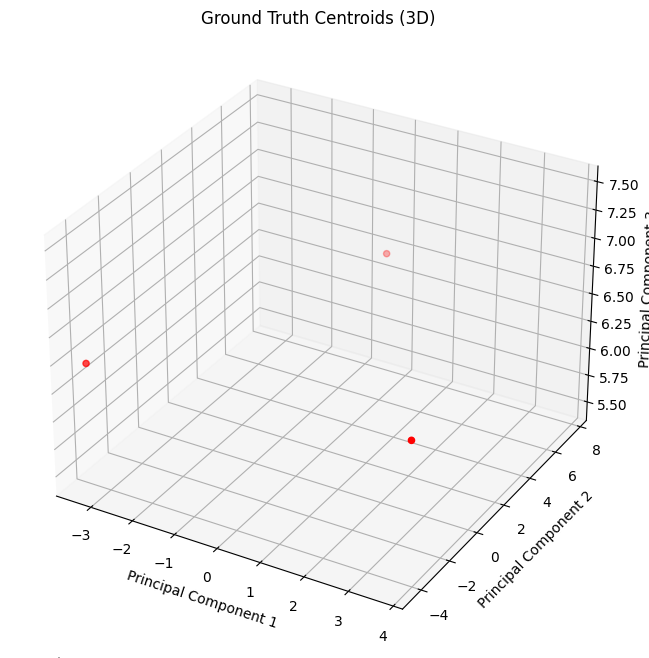

In [23]:
# Plot the centroids in 3D space
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='r', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('Ground Truth Centroids (3D)')
plt.show()

### **Datasplit - X, X_train and X_test**

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
X_train

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
9789,664063.816584,2333.956002,1.909499,1.906140,1.904911,1.903984,1.904292,1.905542,0.0,0.0,...,1.576117,2.099850,64128.0,65024.0,2.495714e+09,2.936313e+08,0.014995,0.001868,0.014342,2.164800e+06
7263,447462.160284,1324.999374,2.992250,1.956493,3.280499,2.137423,2.731039,2.663139,0.0,0.0,...,1.891107,1.648011,64256.0,65024.0,2.043686e+09,1.618366e+09,0.151935,0.133785,0.027020,1.028606e+06
2932,236063.418954,8202.246354,4.737295,4.477248,4.835465,4.591553,4.862110,3.644770,0.0,0.0,...,6.307335,29.118550,56960.0,64768.0,8.507672e+08,5.466176e+08,0.047971,0.020919,0.026403,1.098296e+06
9786,664062.237907,2329.564234,1.913800,1.912304,1.913908,1.913048,1.912570,1.914645,0.0,0.0,...,1.567791,2.091048,64128.0,65024.0,2.495714e+09,2.936313e+08,0.014001,0.001637,0.012520,2.364825e+06
2270,119646.416871,5487.642188,4.935297,3.721782,3.651930,4.663535,4.554954,4.704071,0.0,0.0,...,10.956757,29.675869,56960.0,64896.0,8.507672e+08,5.466176e+08,0.043624,0.020918,0.025331,7.481369e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,637842.392373,25324.347257,0.323884,0.336725,0.325118,0.310569,0.338634,0.300003,0.0,0.0,...,28.170875,27.412806,56704.0,64896.0,2.542816e+09,3.847444e+09,0.018744,0.007810,0.027104,1.350396e+06
5191,621174.080519,18814.644336,0.249412,0.258637,0.311403,0.341875,0.244438,0.297379,0.0,0.0,...,21.678560,26.217586,56448.0,64768.0,1.845250e+09,4.388114e+08,0.021797,0.002245,0.020035,1.278613e+06
5390,613094.503112,17298.677915,0.356897,0.532837,0.374227,0.545199,0.484583,0.700138,0.0,0.0,...,22.229216,18.815246,56192.0,64768.0,1.903045e+09,5.429505e+08,0.030092,0.001415,0.029700,1.156060e+06
860,526086.000000,5976.000000,1.047937,1.047937,1.047937,1.047937,1.047937,1.047937,0.0,0.0,...,0.954256,0.954256,512.0,64240.0,7.061805e+08,2.905999e+09,0.002085,0.002085,0.000000,2.207923e+06


In [25]:
X_test

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
8432,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,1.771186,1.346425,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05
5680,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,33.262600,38.289493,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06
4767,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,34.998405,50.872519,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05
9218,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,1.750682,2.250765,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06
621,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,4.000331,3.000248,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,664611.336644,2619.439858,1.866206,1.883590,1.868661,1.881472,1.863862,1.867791,0.0,0.0,...,1.598268,2.140264,64128.0,65024.0,4.218550e+08,1.770455e+09,0.017556,0.001885,0.019715,3.526948e+05
9155,455234.910255,194.612521,3.891595,3.613938,3.326338,3.337980,3.980882,3.215810,0.0,0.0,...,2.306333,1.497726,64256.0,64896.0,6.010938e+08,3.265196e+09,1.001778,0.405318,0.026356,1.272696e+06
594,34817.000000,7.000000,4.498744,4.498744,4.498744,4.498744,4.498744,4.498744,0.0,0.0,...,4.223401,6.223959,4094.0,5549.0,1.093752e+09,3.441352e+09,0.000000,0.000000,0.000000,9.435900e+04
5563,636911.618669,25259.810066,0.204607,0.219529,0.187462,0.190487,0.218758,0.207756,0.0,0.0,...,38.116638,44.712333,56704.0,64896.0,2.542816e+09,3.847444e+09,0.019125,0.001697,0.017450,2.071909e+06


In [26]:
y_train

9789    2
7263    2
2932    1
9786    2
2270    1
       ..
5734    1
5191    1
5390    1
860     2
7270    2
Name: slice Type, Length: 8910, dtype: int64

In [27]:
y_test

8432    2
5680    1
4767    1
9218    2
621     2
       ..
8640    2
9155    2
594     2
5563    1
3434    1
Name: slice Type, Length: 990, dtype: int64

# **EDA**

## Pair Plots

In [28]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [29]:
# sns.pairplot(X_tsne)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

## Heatmaps

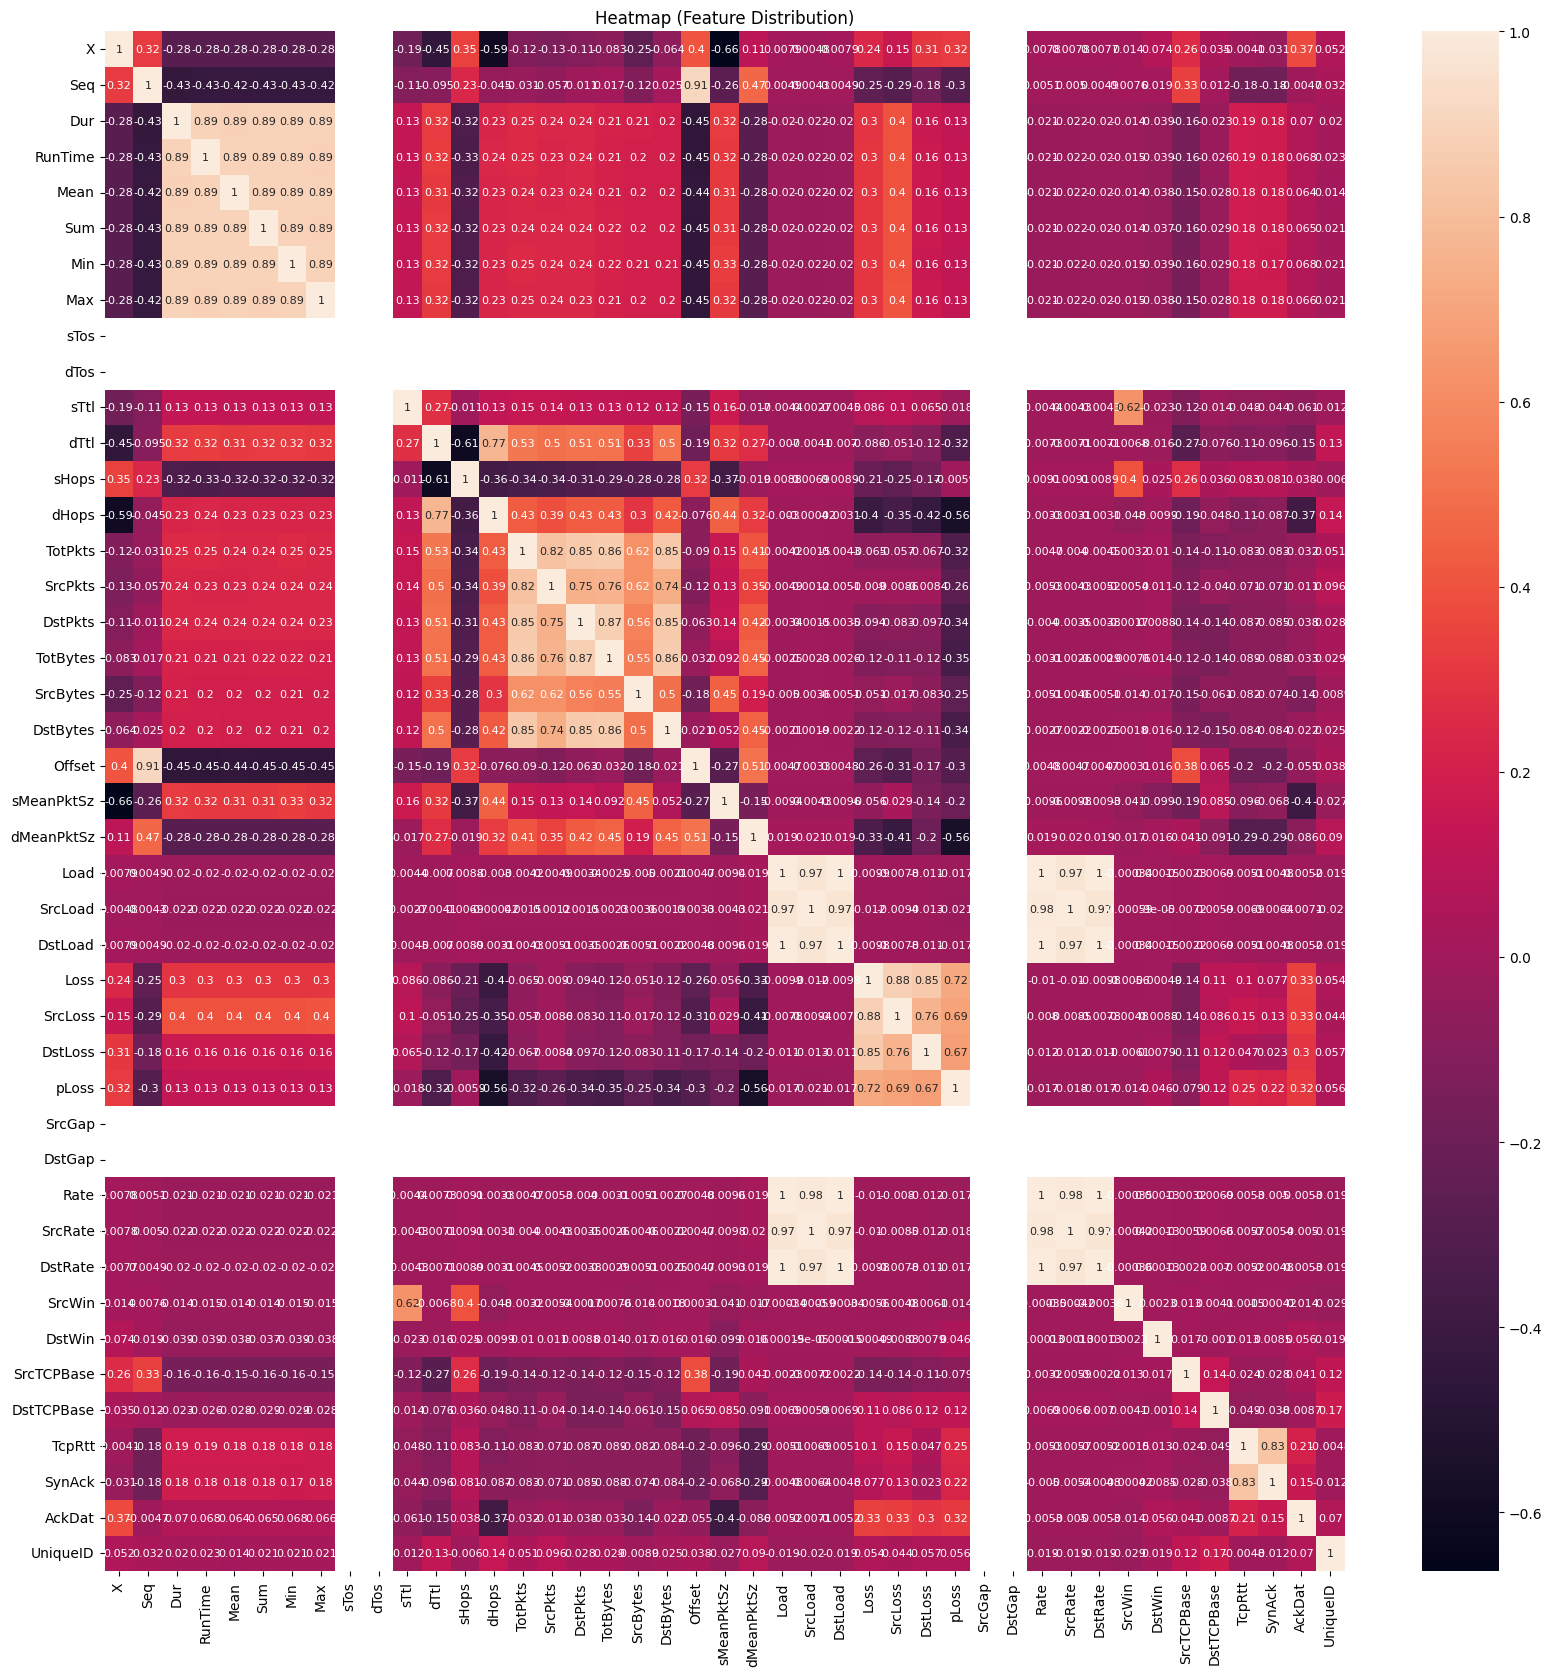

In [30]:
# Create a heatmap for the correlation matrix of all features
plt.figure(figsize=(20, 20))
sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

# **Data Modelling and Analysis**

## **Model Training**

In [28]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

## **Hyperparameter Tuning**

In [29]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [100, 200, 300, 400, 500],
#     # 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=20, scoring='neg_mean_squared_error')
# grid_search.fit(X_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

## **Model Labels**

In [30]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

In [31]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

array([2, 2, 2, ..., 2, 3, 2], dtype=int32)

In [32]:
len(kmeans_model_labels_aligned)

8910

In [33]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

## **Model Centroids**

In [34]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

array([[5.63143431e+05, 1.40360160e+04, 1.59268883e+00, 1.58338503e+00,
        1.58479262e+00, 1.58654259e+00, 1.58788887e+00, 1.59559413e+00,
        0.00000000e+00, 0.00000000e+00, 6.31427445e+01, 6.29562303e+01,
        9.07728707e-01, 5.15851735e+00, 5.51471265e+01, 2.53897154e+01,
        3.02008042e+01, 4.04935112e+04, 3.19441702e+03, 3.74659222e+04,
        7.93164292e+06, 1.00230186e+02, 8.46000177e+02, 2.70858130e+06,
        6.46057381e+04, 2.64538344e+06, 1.48675185e+00, 4.40251450e-01,
        1.04608566e+00, 6.07198535e+00, 0.00000000e+00, 0.00000000e+00,
        3.94122567e+02, 1.08595910e+02, 2.54585296e+02, 7.44781380e+04,
        6.79514696e+04, 2.63824508e+09, 3.87812556e+09, 5.91139629e-02,
        4.05303640e-02, 2.15345662e-02, 1.39847892e+06],
       [4.91511817e+05, 1.04738999e+04, 2.22420744e+00, 2.22691116e+00,
        2.23322004e+00, 2.22868916e+00, 2.24139206e+00, 2.23858763e+00,
        0.00000000e+00, 0.00000000e+00, 6.33897140e+01, 7.45594059e+01,
       

In [35]:
C1 = kmeans_model_centroids[0]
C1

array([5.63143431e+05, 1.40360160e+04, 1.59268883e+00, 1.58338503e+00,
       1.58479262e+00, 1.58654259e+00, 1.58788887e+00, 1.59559413e+00,
       0.00000000e+00, 0.00000000e+00, 6.31427445e+01, 6.29562303e+01,
       9.07728707e-01, 5.15851735e+00, 5.51471265e+01, 2.53897154e+01,
       3.02008042e+01, 4.04935112e+04, 3.19441702e+03, 3.74659222e+04,
       7.93164292e+06, 1.00230186e+02, 8.46000177e+02, 2.70858130e+06,
       6.46057381e+04, 2.64538344e+06, 1.48675185e+00, 4.40251450e-01,
       1.04608566e+00, 6.07198535e+00, 0.00000000e+00, 0.00000000e+00,
       3.94122567e+02, 1.08595910e+02, 2.54585296e+02, 7.44781380e+04,
       6.79514696e+04, 2.63824508e+09, 3.87812556e+09, 5.91139629e-02,
       4.05303640e-02, 2.15345662e-02, 1.39847892e+06])

In [36]:
C2 = kmeans_model_centroids[1]
C2

array([4.91511817e+05, 1.04738999e+04, 2.22420744e+00, 2.22691116e+00,
       2.23322004e+00, 2.22868916e+00, 2.24139206e+00, 2.23858763e+00,
       0.00000000e+00, 0.00000000e+00, 6.33897140e+01, 7.45594059e+01,
       6.27887789e-01, 6.18976898e+00, 8.79823309e+01, 3.21641986e+01,
       5.55760932e+01, 7.57581211e+04, 5.96037842e+03, 7.20534563e+04,
       5.32574100e+06, 1.27368972e+02, 8.30875313e+02, 3.08583902e+05,
       2.37581380e+04, 2.84493435e+05, 1.44720987e+00, 5.66390850e-01,
       8.64400399e-01, 5.18699145e+00, 0.00000000e+00, 0.00000000e+00,
       5.44120174e+01, 2.19834881e+01, 2.98543432e+01, 6.13316826e+04,
       6.36210468e+04, 1.78254521e+09, 9.60479190e+08, 7.47424557e-02,
       5.23705572e-02, 2.08867093e-02, 1.08106559e+06])

In [37]:
C3 = kmeans_model_centroids[2]
C3

array([4.42522606e+05, 4.42491096e+03, 2.74088641e+00, 2.74610406e+00,
       2.73949606e+00, 2.74543644e+00, 2.74000419e+00, 2.74660924e+00,
       0.00000000e+00, 0.00000000e+00, 6.36161432e+01, 7.92286340e+01,
       4.07231556e-01, 6.46493791e+00, 5.87783841e+01, 2.73008388e+01,
       3.19905325e+01, 3.80130410e+04, 4.76495468e+03, 3.29463911e+04,
       2.18597261e+06, 1.82974435e+02, 5.34465901e+02, 1.58700130e+06,
       6.12308333e+04, 1.53073285e+06, 3.07760137e+00, 1.39374656e+00,
       1.60597135e+00, 7.92678077e+00, 0.00000000e+00, 0.00000000e+00,
       2.65753710e+02, 9.76965364e+01, 1.49523893e+02, 6.11663221e+04,
       6.04373203e+04, 1.02985141e+09, 3.11569029e+09, 5.84294226e-02,
       3.85862973e-02, 1.97573203e-02, 1.22251684e+06])

## **Initialization of an empty array before Centroid Mapping based on Ground Truths**

In [38]:
feature_lists = [features, features, features]
feature_lists

[['X',
  'Seq',
  'Dur',
  'RunTime',
  'Mean',
  'Sum',
  'Min',
  'Max',
  'sTos',
  'dTos',
  'sTtl',
  'dTtl',
  'sHops',
  'dHops',
  'TotPkts',
  'SrcPkts',
  'DstPkts',
  'TotBytes',
  'SrcBytes',
  'DstBytes',
  'Offset',
  'sMeanPktSz',
  'dMeanPktSz',
  'Load',
  'SrcLoad',
  'DstLoad',
  'Loss',
  'SrcLoss',
  'DstLoss',
  'pLoss',
  'SrcGap',
  'DstGap',
  'Rate',
  'SrcRate',
  'DstRate',
  'SrcWin',
  'DstWin',
  'SrcTCPBase',
  'DstTCPBase',
  'TcpRtt',
  'SynAck',
  'AckDat',
  'UniqueID'],
 ['X',
  'Seq',
  'Dur',
  'RunTime',
  'Mean',
  'Sum',
  'Min',
  'Max',
  'sTos',
  'dTos',
  'sTtl',
  'dTtl',
  'sHops',
  'dHops',
  'TotPkts',
  'SrcPkts',
  'DstPkts',
  'TotBytes',
  'SrcBytes',
  'DstBytes',
  'Offset',
  'sMeanPktSz',
  'dMeanPktSz',
  'Load',
  'SrcLoad',
  'DstLoad',
  'Loss',
  'SrcLoss',
  'DstLoss',
  'pLoss',
  'SrcGap',
  'DstGap',
  'Rate',
  'SrcRate',
  'DstRate',
  'SrcWin',
  'DstWin',
  'SrcTCPBase',
  'DstTCPBase',
  'TcpRtt',
  'SynAck',
  '

In [39]:
len(features)

43

In [40]:
# Determine the number of columns (max length of feature lists)
num_columns = max(len(feature_list) for feature_list in feature_lists)
num_columns

43

In [41]:
# Create an empty NumPy array with 3 rows and num_columns columns, filled with 0.0
arr = np.zeros((3, num_columns))
print(arr)
print(arr.dtype)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
float64


## **Minimum Distance of C1 from Ground Truths**

In [42]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

1698297958.62297

In [43]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

1564489005.2761984

In [44]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

1945860793.8415167

In [45]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "Slice 1"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "Slice 2"
    arr[0] = C2
else:
    closest_centroid_C1 = "Slice 3"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

C1 has minimum distance of  1564489005.2761984 from the Model's Centroid/Cluster Slice 2


array([[4.91511817e+05, 1.04738999e+04, 2.22420744e+00, 2.22691116e+00,
        2.23322004e+00, 2.22868916e+00, 2.24139206e+00, 2.23858763e+00,
        0.00000000e+00, 0.00000000e+00, 6.33897140e+01, 7.45594059e+01,
        6.27887789e-01, 6.18976898e+00, 8.79823309e+01, 3.21641986e+01,
        5.55760932e+01, 7.57581211e+04, 5.96037842e+03, 7.20534563e+04,
        5.32574100e+06, 1.27368972e+02, 8.30875313e+02, 3.08583902e+05,
        2.37581380e+04, 2.84493435e+05, 1.44720987e+00, 5.66390850e-01,
        8.64400399e-01, 5.18699145e+00, 0.00000000e+00, 0.00000000e+00,
        5.44120174e+01, 2.19834881e+01, 2.98543432e+01, 6.13316826e+04,
        6.36210468e+04, 1.78254521e+09, 9.60479190e+08, 7.47424557e-02,
        5.23705572e-02, 2.08867093e-02, 1.08106559e+06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       

## **Minimum Distance of C2 from Ground Truths**

In [46]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

1420285399.1509225

In [47]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

1676689183.281287

In [48]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

1097137584.0092678

In [49]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "Slice 1"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "Slice 2"
    arr[1] = C2
else:
    closest_centroid_C2 = "Slice 3"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

C2 has minimum distance of  1097137584.0092678 from the Model's Centroid/Cluster Slice 3


array([[4.91511817e+05, 1.04738999e+04, 2.22420744e+00, 2.22691116e+00,
        2.23322004e+00, 2.22868916e+00, 2.24139206e+00, 2.23858763e+00,
        0.00000000e+00, 0.00000000e+00, 6.33897140e+01, 7.45594059e+01,
        6.27887789e-01, 6.18976898e+00, 8.79823309e+01, 3.21641986e+01,
        5.55760932e+01, 7.57581211e+04, 5.96037842e+03, 7.20534563e+04,
        5.32574100e+06, 1.27368972e+02, 8.30875313e+02, 3.08583902e+05,
        2.37581380e+04, 2.84493435e+05, 1.44720987e+00, 5.66390850e-01,
        8.64400399e-01, 5.18699145e+00, 0.00000000e+00, 0.00000000e+00,
        5.44120174e+01, 2.19834881e+01, 2.98543432e+01, 6.13316826e+04,
        6.36210468e+04, 1.78254521e+09, 9.60479190e+08, 7.47424557e-02,
        5.23705572e-02, 2.08867093e-02, 1.08106559e+06],
       [4.42522606e+05, 4.42491096e+03, 2.74088641e+00, 2.74610406e+00,
        2.73949606e+00, 2.74543644e+00, 2.74000419e+00, 2.74660924e+00,
        0.00000000e+00, 0.00000000e+00, 6.36161432e+01, 7.92286340e+01,
       

## **Minimum Distance of C3 from Ground Truths**

In [50]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

1093881809.4087512

In [51]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

816069339.0012386

In [52]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

1484846880.8554587

In [53]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "Slice 1"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "Slice 2"
    arr[2] = C2
else:
    closest_centroid_C3 = "Slice 3"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

C3 has minimum distance of  816069339.0012386 from the Model's Centroid/Cluster Slice 2


array([[4.91511817e+05, 1.04738999e+04, 2.22420744e+00, 2.22691116e+00,
        2.23322004e+00, 2.22868916e+00, 2.24139206e+00, 2.23858763e+00,
        0.00000000e+00, 0.00000000e+00, 6.33897140e+01, 7.45594059e+01,
        6.27887789e-01, 6.18976898e+00, 8.79823309e+01, 3.21641986e+01,
        5.55760932e+01, 7.57581211e+04, 5.96037842e+03, 7.20534563e+04,
        5.32574100e+06, 1.27368972e+02, 8.30875313e+02, 3.08583902e+05,
        2.37581380e+04, 2.84493435e+05, 1.44720987e+00, 5.66390850e-01,
        8.64400399e-01, 5.18699145e+00, 0.00000000e+00, 0.00000000e+00,
        5.44120174e+01, 2.19834881e+01, 2.98543432e+01, 6.13316826e+04,
        6.36210468e+04, 1.78254521e+09, 9.60479190e+08, 7.47424557e-02,
        5.23705572e-02, 2.08867093e-02, 1.08106559e+06],
       [4.42522606e+05, 4.42491096e+03, 2.74088641e+00, 2.74610406e+00,
        2.73949606e+00, 2.74543644e+00, 2.74000419e+00, 2.74660924e+00,
        0.00000000e+00, 0.00000000e+00, 6.36161432e+01, 7.92286340e+01,
       

## **Model Centroids Mapping to Labels**

In [54]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

C1 has minimum distance of  1564489005.2761984 from the Model's Centroid/Cluster Slice 2
C2 has minimum distance of  1097137584.0092678 from the Model's Centroid/Cluster Slice 3
C3 has minimum distance of  816069339.0012386 from the Model's Centroid/Cluster Slice 2


In [55]:
best_model

KMeans(n_clusters=3, random_state=42)

In [56]:
kmeans_model_mod = best_model
kmeans_model_mod

KMeans(n_clusters=3, random_state=42)

In [57]:
kmeans_model_mod.cluster_centers_ = arr

In [58]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

array([[4.91511817e+05, 1.04738999e+04, 2.22420744e+00, 2.22691116e+00,
        2.23322004e+00, 2.22868916e+00, 2.24139206e+00, 2.23858763e+00,
        0.00000000e+00, 0.00000000e+00, 6.33897140e+01, 7.45594059e+01,
        6.27887789e-01, 6.18976898e+00, 8.79823309e+01, 3.21641986e+01,
        5.55760932e+01, 7.57581211e+04, 5.96037842e+03, 7.20534563e+04,
        5.32574100e+06, 1.27368972e+02, 8.30875313e+02, 3.08583902e+05,
        2.37581380e+04, 2.84493435e+05, 1.44720987e+00, 5.66390850e-01,
        8.64400399e-01, 5.18699145e+00, 0.00000000e+00, 0.00000000e+00,
        5.44120174e+01, 2.19834881e+01, 2.98543432e+01, 6.13316826e+04,
        6.36210468e+04, 1.78254521e+09, 9.60479190e+08, 7.47424557e-02,
        5.23705572e-02, 2.08867093e-02, 1.08106559e+06],
       [4.42522606e+05, 4.42491096e+03, 2.74088641e+00, 2.74610406e+00,
        2.73949606e+00, 2.74543644e+00, 2.74000419e+00, 2.74660924e+00,
        0.00000000e+00, 0.00000000e+00, 6.36161432e+01, 7.92286340e+01,
       

## **Due to conflict in mapping observed in the above step, we didn't proceed with next steps.**

## **Model Testing**

In [59]:
# Predict the labels for the test data
# y_pred = kmeans_model.predict(X_test)
y_pred = kmeans_model_mod.predict(X_test)
y_pred

In [60]:
y_pred_aligned = y_pred + 1
y_pred_aligned

In [61]:
len(y_pred_aligned)

In [62]:
np.unique(y_pred_aligned)

## **Update testing dataset with labels**

In [63]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [64]:
# Display the Updated Table
X_test_with_labels[:20]

## **Predicted Label Analysis**

In [65]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

In [66]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [67]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

In [68]:
conf_matrix = cm
conf_matrix

In [69]:
# True Positives (TP) for each class
TP_class0 = conf_matrix[0, 0]
TP_class1 = conf_matrix[1, 1]
TP_class2 = conf_matrix[2, 2]

# False Positives (FP) for each class
FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# False Negatives (FN) for each class
FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# True Negatives (TN) for each class
TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = TP_class0 + TP_class1 + TP_class2
FP = FP_class0 + FP_class1 + FP_class2
FN = FN_class0 + FN_class1 + FN_class2
TN = TN_class0 + TN_class1 + TN_class2

# Display the values
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

In [70]:
acc = (TP + TN)/(TP + TN + FP + FN)
pres = TP/(TP + FP)
rec = TP/(TP + FN)
f1 = 2 * ((pres * rec)/(pres + rec))
print("Accuracy", acc)
print("Precision", pres)
print("Recall", rec)
print("F1-score", f1)

# **SYNC NOTEBOOKS**

In [71]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp13 & 15 - Slice_Identification_UnSupML.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'